## Problem Statement

### 1) Extract reviews of any product from ecommerce website like amazon

### 2) Perform emotion mining

In [1]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [2]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

### Looping through multiple pages
#### One of the easiest methods to scrape multiple pages is to modify the base URL to accept a page variable that increments as needed.

#### Try for myself See how the URL changes as you go through multiple pages.

#### For Amazon product reviews, the only thing that seems to change is the number indicating which page it is.

In [3]:
def get_soup(url):
    #r = requests.get('http://localhost:8050/render.html', 
    # Run this instead if you haven't setup Splash & Docker
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [4]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),    
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [5]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [7]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5/\
    ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

C:\Users\kumar\AppData\Local\Temp/ipykernel_10724/965255522.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(1,1000)):


  0%|          | 0/999 [00:00<?, ?it/s]

In [8]:
# Save results to a dataframe, then export as CSV
df = pd.DataFrame(reviewlist)
df

Rating                                              Title  \
0        4.0  It's nice compared to other phones at this range.   
1        4.0                    बैटरी बैकअप कम है और की अपेक्षा   
2        4.0             Headphone jack is not working properly   
3        4.0                                   Good Performance   
4        4.0                          It's a good Android phone   
...      ...                                                ...   
6895     1.0  Mobile is getting heated very much while charg...   
6896     1.0                                Worst phone ever...   
6897     1.0                                       Hank problem   
6898     1.0     Voice  are not heard after attending the calls   
6899     1.0                        Gets automatic switched off   

                                                 Review  \
0     The dislike part is that sometimes the volume ...   
1                       बैटरी बैकअप कम है और की अपेक्षा   
2                            Fingerprint reader is good   
3     Nice mobile. Good Performance One Plus Nord Ce...   
4                                    Good Android phone   
...                                                 ...   
6895  Mobile is getting heated very much...while cha...   
6896  I'm writing this review after using 10 days.Ca...   
6897                                       Hank problem   
6898                                 Voice quality poor   
6899  Gets automatic switched off/ becomes to hotAut...   

                                Review_Date  
0                         20 September 2022  
1                         21 September 2022  
2                         21 September 2022  
3                         19 September 2022  
4                         21 September 2022  
...                                     ...  
6895  Reviewed in India 🇮🇳 on 25 April 2022  
6896     Reviewed in India 🇮🇳 on 5 May 2022  
6897   Reviewed in India 🇮🇳 on 25 June 2022  
6898   Reviewed in India 🇮🇳 on 25 June 2022  
6899  Reviewed in India 🇮🇳 on 28 April 2022  

[6900 rows x 4 columns]

In [9]:
df.to_csv("D:/execlr/Assignments/Assignment 11/Amazon_Reviews_Oneplus_Nord_CE2.csv")

In [10]:
# Importing Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string
import warnings
import spacy
from tqdm.notebook import tqdm_notebook

In [11]:
# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

In [12]:
# for sklearn operations like:- CountVectorizer, LogisticRegression and many more 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [13]:
# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

In [14]:
# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is alr

In [15]:
# load the dataset
reviews=pd.read_csv("D:/execlr/Assignments/Assignment 11/Amazon_Reviews_Oneplus_Nord_CE2.csv")
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

Rating                                              Title  \
0          4                                   Good Performance   
1          4  Compared to older OnePlus models, there is a d...   
2          4             Headphone jack is not working properly   
3          4                                               Good   
4          4                       Overall performance is good.   
...      ...                                                ...   
4995       1                        Gets automatic switched off   
4996       4                             Good phone you can buy   
4997       1               Don't buy, totally wastage of money.   
4998       5                                     Value of money   
4999       1                                         Be happy 😌   

                                                 Review        Review_Date  
0     Nice mobile. Good Performance One Plus Nord Ce...  19 September 2022  
1     Pros#Nice looks & good build#Clean UI sans blo...  19 September 2022  
2                            Fingerprint reader is good  21 September 2022  
3                                                  Good  16 September 2022  
4     Like-1. Camera 📸 quality is good.2. Touch is q...     30 August 2022  
...                                                 ...                ...  
4995  Gets automatic switched off/ becomes to hotAut...      28 April 2022  
4996  Picture quality not as much as good.Advertisem...       08 June 2022  
4997  According to specs price is so high, during re...      23 April 2022  
4998  Good mobile phone I was use 3 months after rev...  13 September 2022  
4999                                           Be happy       21 June 2022  

[5000 rows x 4 columns]

In [16]:
# Data Exploration
reviews.Rating.describe()

count    5000.000000
mean        4.013800
std         1.294583
min         1.000000
25%         3.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

In [17]:
# Number of Words
reviews['word_count'] = reviews['Review'].apply(lambda x: len(str(x).split(" ")))
reviews[['Review','word_count']].head()

Review  word_count
0  Nice mobile. Good Performance One Plus Nord Ce...          23
1  Pros#Nice looks & good build#Clean UI sans blo...          32
2                         Fingerprint reader is good           4
3                                               Good           1
4  Like-1. Camera 📸 quality is good.2. Touch is q...          87

In [18]:
# Number of characters
reviews['char_count'] = reviews['Review'].str.len() # this also includes spaces
reviews[['Review','char_count']].head()

Review  char_count
0  Nice mobile. Good Performance One Plus Nord Ce...       131.0
1  Pros#Nice looks & good build#Clean UI sans blo...       241.0
2                         Fingerprint reader is good        26.0
3                                               Good         4.0
4  Like-1. Camera 📸 quality is good.2. Touch is q...       531.0

In [19]:
# Average Word Length
def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

reviews['avg_word'] = reviews['Review'].apply(lambda x: avg_word(x))
reviews[['Review','avg_word']].head()

Review  avg_word
0  Nice mobile. Good Performance One Plus Nord Ce...  4.739130
1  Pros#Nice looks & good build#Clean UI sans blo...  6.562500
2                         Fingerprint reader is good  5.750000
3                                               Good  4.000000
4  Like-1. Camera 📸 quality is good.2. Touch is q...  5.174419

In [20]:
# Number of stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
reviews['stopwords'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews[['Review','stopwords']].head()

Review  stopwords
0  Nice mobile. Good Performance One Plus Nord Ce...          4
1  Pros#Nice looks & good build#Clean UI sans blo...          4
2                         Fingerprint reader is good          1
3                                               Good          0
4  Like-1. Camera 📸 quality is good.2. Touch is q...         21

In [21]:
# Number of special characters
reviews['hashtags'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews[['Review','hashtags']].head()

Review  hashtags
0  Nice mobile. Good Performance One Plus Nord Ce...         0
1  Pros#Nice looks & good build#Clean UI sans blo...         2
2                         Fingerprint reader is good         0
3                                               Good         0
4  Like-1. Camera 📸 quality is good.2. Touch is q...         0

In [22]:
# Number of numerics
reviews['numerics'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
reviews[['Review','numerics']].head()

Review  numerics
0  Nice mobile. Good Performance One Plus Nord Ce...         0
1  Pros#Nice looks & good build#Clean UI sans blo...         1
2                         Fingerprint reader is good         0
3                                               Good         0
4  Like-1. Camera 📸 quality is good.2. Touch is q...         3

In [23]:
# Number of Uppercase words
reviews['upper'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
reviews[['Review','upper']].head()

Review  upper
0  Nice mobile. Good Performance One Plus Nord Ce...      0
1  Pros#Nice looks & good build#Clean UI sans blo...      2
2                         Fingerprint reader is good      0
3                                               Good      0
4  Like-1. Camera 📸 quality is good.2. Touch is q...      1

In [24]:
reviews.drop(['numerics','hashtags','stopwords','avg_word','char_count','word_count','upper'],axis=1,inplace=True)

In [25]:
reviews

Rating                                              Title  \
0          4                                   Good Performance   
1          4  Compared to older OnePlus models, there is a d...   
2          4             Headphone jack is not working properly   
3          4                                               Good   
4          4                       Overall performance is good.   
...      ...                                                ...   
4995       1                        Gets automatic switched off   
4996       4                             Good phone you can buy   
4997       1               Don't buy, totally wastage of money.   
4998       5                                     Value of money   
4999       1                                         Be happy 😌   

                                                 Review        Review_Date  
0     Nice mobile. Good Performance One Plus Nord Ce...  19 September 2022  
1     Pros#Nice looks & good build#Clean UI sans blo...  19 September 2022  
2                            Fingerprint reader is good  21 September 2022  
3                                                  Good  16 September 2022  
4     Like-1. Camera 📸 quality is good.2. Touch is q...     30 August 2022  
...                                                 ...                ...  
4995  Gets automatic switched off/ becomes to hotAut...      28 April 2022  
4996  Picture quality not as much as good.Advertisem...       08 June 2022  
4997  According to specs price is so high, during re...      23 April 2022  
4998  Good mobile phone I was use 3 months after rev...  13 September 2022  
4999                                           Be happy       21 June 2022  

[5000 rows x 4 columns]

###  Spelling correction
#### We’ve all seen tweets with a plethora of spelling mistakes. Our timelines are often filled with hastly sent tweets that are barely legible at times.
#### In that regard, spelling correction is a useful pre-processing step because this also will help us in reducing multiple copies of words.
#### To achieve this we will use the textblob library.

In [26]:
from textblob import TextBlob
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    Vice mobile. Good Performance One Plus Word He...
1    Gros#Vice looks & good build#Clean of sans blo...
2                           Fingerprint reader is good
3                                                 Good
4    Like-1. Camera 📸 quality is good.2. Touch is q...
Name: Review, dtype: object

In [27]:
# Feature Engineering
print(reviews['Review_Date'].str.split(' ').str[0],'\n',reviews['Review_Date'].str.split(' ').str[1],'\n',reviews['Review_Date'].str.split(' ').str[2])

0       19
1       19
2       21
3       16
4       30
        ..
4995    28
4996    08
4997    23
4998    13
4999    21
Name: Review_Date, Length: 5000, dtype: object 
 0       September
1       September
2       September
3       September
4          August
          ...    
4995        April
4996         June
4997        April
4998    September
4999         June
Name: Review_Date, Length: 5000, dtype: object 
 0       2022
1       2022
2       2022
3       2022
4       2022
        ... 
4995    2022
4996    2022
4997    2022
4998    2022
4999    2022
Name: Review_Date, Length: 5000, dtype: object


In [28]:
# Spliting Review Date into Three seperate Columns (Year,Month,Day)
df=reviews.copy()
df['Date']=df['Review_Date'].str.split(' ').str[0]
df['Month']=df['Review_Date'].str.split(' ').str[1]
df['Year']=df['Review_Date'].str.split(' ').str[2]
df[['Date','Month','Year']]


Date      Month  Year
0      19  September  2022
1      19  September  2022
2      21  September  2022
3      16  September  2022
4      30     August  2022
...   ...        ...   ...
4995   28      April  2022
4996   08       June  2022
4997   23      April  2022
4998   13  September  2022
4999   21       June  2022

[5000 rows x 3 columns]

In [29]:
df.Month.value_counts()

March        1068
April         956
June          665
May           665
July          603
August        531
September     291
February      221
Name: Month, dtype: int64

In [30]:
# Change 'month' from words to numbers for easier analysis
order={'Month':{'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12 }}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]

Month
0         9
1         9
2         9
3         9
4         8
...     ...
4995      4
4996      6
4997      4
4998      9
4999      6

[5000 rows x 1 columns]

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rating       5000 non-null   int64 
 1   Title        5000 non-null   object
 2   Review       4702 non-null   object
 3   Review_Date  5000 non-null   object
 4   Date         5000 non-null   object
 5   Month        5000 non-null   int64 
 6   Year         5000 non-null   object
dtypes: int64(2), object(5)
memory usage: 273.6+ KB


In [32]:
df1[['Date','Year']]=df1[['Date','Year']].astype('int64')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rating       5000 non-null   int64 
 1   Title        5000 non-null   object
 2   Review       4702 non-null   object
 3   Review_Date  5000 non-null   object
 4   Date         5000 non-null   int64 
 5   Month        5000 non-null   int64 
 6   Year         5000 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 273.6+ KB


In [33]:
# Dropping the Original Columns after splitting the data
df1.drop('Review_Date',axis=1, inplace=True)
df1.head()

Rating                                              Title  \
0       4                                   Good Performance   
1       4  Compared to older OnePlus models, there is a d...   
2       4             Headphone jack is not working properly   
3       4                                               Good   
4       4                       Overall performance is good.   

                                              Review  Date  Month  Year  
0  Nice mobile. Good Performance One Plus Nord Ce...    19      9  2022  
1  Pros#Nice looks & good build#Clean UI sans blo...    19      9  2022  
2                         Fingerprint reader is good    21      9  2022  
3                                               Good    16      9  2022  
4  Like-1. Camera 📸 quality is good.2. Touch is q...    30      8  2022

In [34]:
df

Rating                                              Title  \
0          4                                   Good Performance   
1          4  Compared to older OnePlus models, there is a d...   
2          4             Headphone jack is not working properly   
3          4                                               Good   
4          4                       Overall performance is good.   
...      ...                                                ...   
4995       1                        Gets automatic switched off   
4996       4                             Good phone you can buy   
4997       1               Don't buy, totally wastage of money.   
4998       5                                     Value of money   
4999       1                                         Be happy 😌   

                                                 Review        Review_Date  \
0     Nice mobile. Good Performance One Plus Nord Ce...  19 September 2022   
1     Pros#Nice looks & good build#Clean UI sans blo...  19 September 2022   
2                            Fingerprint reader is good  21 September 2022   
3                                                  Good  16 September 2022   
4     Like-1. Camera 📸 quality is good.2. Touch is q...     30 August 2022   
...                                                 ...                ...   
4995  Gets automatic switched off/ becomes to hotAut...      28 April 2022   
4996  Picture quality not as much as good.Advertisem...       08 June 2022   
4997  According to specs price is so high, during re...      23 April 2022   
4998  Good mobile phone I was use 3 months after rev...  13 September 2022   
4999                                           Be happy       21 June 2022   

     Date      Month  Year  
0      19  September  2022  
1      19  September  2022  
2      21  September  2022  
3      16  September  2022  
4      30     August  2022  
...   ...        ...   ...  
4995   28      April  2022  
4996   08       June  2022  
4997   23      April  2022  
4998   13  September  2022  
4999   21       June  2022  

[5000 rows x 7 columns]

### Data Visualization

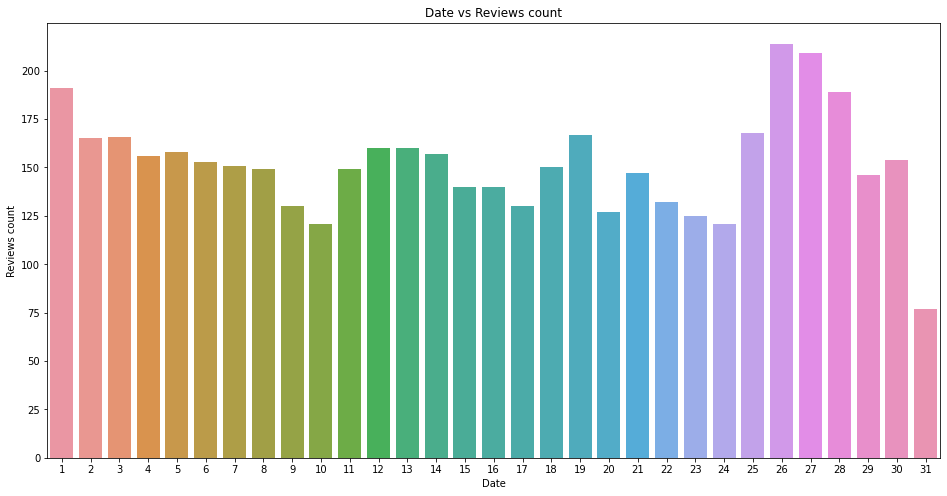

In [35]:
#Creating a dataframe
dayreview = pd.DataFrame(df.groupby('Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Date'].astype('int64')
dayreview.sort_values(by = ['Date'])

#Plotting the graph
plt.figure(figsize=(16,8))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews count')
plt.xlabel('Date')
plt.ylabel('Reviews count')
plt.show()

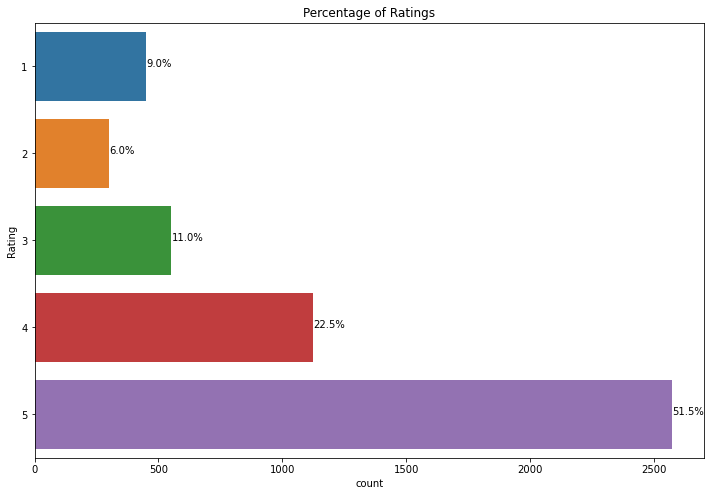

In [36]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

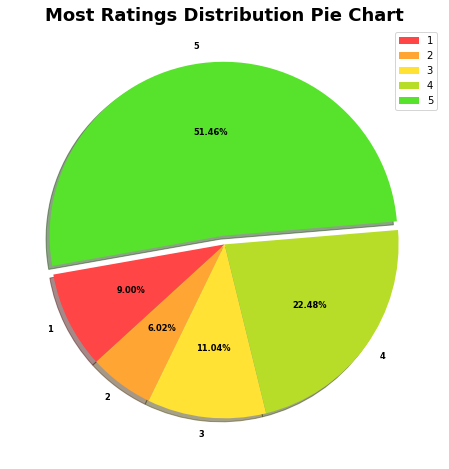

In [37]:
plt.figure(figsize = (12,8))
plt.pie(df['Rating'].value_counts().sort_index(),
       labels=df['Rating'].value_counts().sort_index().index,
       explode = [0.00,0.0,0.0,0.0,0.05],
       autopct= '%.2f%%',
        colors = ["#ff4545", "#ffa534",'#ffe234','#b7dd29','#57e32c'],
       shadow= True,
       startangle= 190,
       textprops = {'size':'small',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Most Ratings Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

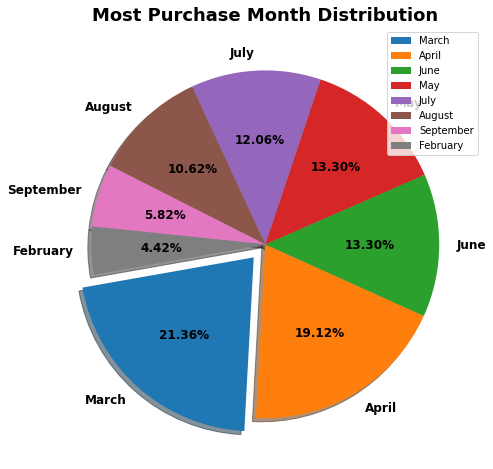

In [43]:
plt.figure(figsize = (12,8))
plt.pie(df['Month'].value_counts(),
       labels=df['Month'].value_counts().index,
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Most Purchase Month Distribution", fontsize = 18, fontweight = 'bold')
plt.show()

In [44]:
# BasicText Preprocessing
# For Sentiment Analysis
# keeping the DataFrame intact and each tweets separate from each other
data = df[['Review']]
data

Review
0     Nice mobile. Good Performance One Plus Nord Ce...
1     Pros#Nice looks & good build#Clean UI sans blo...
2                            Fingerprint reader is good
3                                                  Good
4     Like-1. Camera 📸 quality is good.2. Touch is q...
...                                                 ...
4995  Gets automatic switched off/ becomes to hotAut...
4996  Picture quality not as much as good.Advertisem...
4997  According to specs price is so high, during re...
4998  Good mobile phone I was use 3 months after rev...
4999                                           Be happy

[5000 rows x 1 columns]

In [45]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [46]:
data

Review
0     nice mobile. good performance one plus nord ce...
1     pros#nice looks & good build#clean ui sans blo...
2                               fingerprint reader good
3                                                  good
4     like-1. camera 📸 quality good.2. touch quite s...
...                                                 ...
4995  gets automatic switched off/ becomes hotautoma...
4996  picture quality much good.advertisement ad hoc...
4997  according specs price high, record video high ...
4998  good mobile phone i use 3 months reviewing.goo...
4999                                           be happy

[5000 rows x 1 columns]

In [47]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(data))):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Review"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [48]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": df.Review})
dataframe.head()

Clean_Reviews  \
0  nice mobile good performance one plus nord ce ...   
1  pro nice look good build clean ui sans bloatwa...   
2                            fingerprint reader good   
3                                               good   
4  like camera quality good touch quite smooth se...   

                                   Uncleaned_Reviews  
0  Nice mobile. Good Performance One Plus Nord Ce...  
1  Pros#Nice looks & good build#Clean UI sans blo...  
2                         Fingerprint reader is good  
3                                               Good  
4  Like-1. Camera 📸 quality is good.2. Touch is q...

In [49]:
# Removing '@names'
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [50]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

Clean_Reviews  \
0  nice mobile good performance one plus nord ce ...   
1  pro nice look good build clean ui sans bloatwa...   
2                            fingerprint reader good   
3                                               good   
4  like camera quality good touch quite smooth se...   
5  feature advertised migration data synch quick ...   
6  good phone decent battery backup switched ipho...   
7                                               good   
8                                                      
9                   heating problem outherwise welll   

                                   Uncleaned_Reviews  
0  Nice mobile. Good Performance One Plus Nord Ce...  
1  Pros#Nice looks & good build#Clean UI sans blo...  
2                         Fingerprint reader is good  
3                                               Good  
4  Like-1. Camera 📸 quality is good.2. Touch is q...  
5  Features as advertised. Migration and Data syn...  
6  Good phone. Decent battery backup. I switched ...  
7                                               Good  
8                                   बहुत ही अच्छा है  
9                  Heating problem .outherwise welll

In [51]:
# Removing links (http | https)
cleaned_reviews = []

for index, row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

Clean_Reviews  \
0  nice mobile good performance one plus nord ce ...   
1  pro nice look good build clean ui sans bloatwa...   
2                            fingerprint reader good   
3                                               good   
4  like camera quality good touch quite smooth se...   
5  feature advertised migration data synch quick ...   
6  good phone decent battery backup switched ipho...   
7                                               good   
8                                                      
9                   heating problem outherwise welll   

                                   Uncleaned_Reviews  
0  Nice mobile. Good Performance One Plus Nord Ce...  
1  Pros#Nice looks & good build#Clean UI sans blo...  
2                         Fingerprint reader is good  
3                                               Good  
4  Like-1. Camera 📸 quality is good.2. Touch is q...  
5  Features as advertised. Migration and Data syn...  
6  Good phone. Decent battery backup. I switched ...  
7                                               Good  
8                                   बहुत ही अच्छा है  
9                  Heating problem .outherwise welll

In [52]:
# Removing Review with empty text
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

Clean_Reviews  \
0   nice mobile good performance one plus nord ce ...   
1   pro nice look good build clean ui sans bloatwa...   
2                             fingerprint reader good   
3                                                good   
4   like camera quality good touch quite smooth se...   
5   feature advertised migration data synch quick ...   
6   good phone decent battery backup switched ipho...   
7                                                good   
9                    heating problem outherwise welll   
10              battery mah atleast phone per feature   

                                    Uncleaned_Reviews  
0   Nice mobile. Good Performance One Plus Nord Ce...  
1   Pros#Nice looks & good build#Clean UI sans blo...  
2                          Fingerprint reader is good  
3                                                Good  
4   Like-1. Camera 📸 quality is good.2. Touch is q...  
5   Features as advertised. Migration and Data syn...  
6   Good phone. Decent battery backup. I switched ...  
7                                                Good  
9                   Heating problem .outherwise welll  
10  Battery is 4500 mah and should be atleast 6000...

In [53]:
# Dropping duplicate rows
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

Clean_Reviews  \
0   nice mobile good performance one plus nord ce ...   
1   pro nice look good build clean ui sans bloatwa...   
2                             fingerprint reader good   
3                                                good   
4   like camera quality good touch quite smooth se...   
5   feature advertised migration data synch quick ...   
6   good phone decent battery backup switched ipho...   
7                                                good   
9                    heating problem outherwise welll   
10              battery mah atleast phone per feature   

                                    Uncleaned_Reviews  
0   Nice mobile. Good Performance One Plus Nord Ce...  
1   Pros#Nice looks & good build#Clean UI sans blo...  
2                          Fingerprint reader is good  
3                                                Good  
4   Like-1. Camera 📸 quality is good.2. Touch is q...  
5   Features as advertised. Migration and Data syn...  
6   Good phone. Decent battery backup. I switched ...  
7                                                Good  
9                   Heating problem .outherwise welll  
10  Battery is 4500 mah and should be atleast 6000...

####  Resetting index
##### It seems that our index needs to be reset, since after removal of some rows, some index values are missing, which may cause problem in future operations.

In [54]:
dataframe = dataframe.reset_index(drop=True)
dataframe.head(10)

Clean_Reviews  \
0  nice mobile good performance one plus nord ce ...   
1  pro nice look good build clean ui sans bloatwa...   
2                            fingerprint reader good   
3                                               good   
4  like camera quality good touch quite smooth se...   
5  feature advertised migration data synch quick ...   
6  good phone decent battery backup switched ipho...   
7                                               good   
8                   heating problem outherwise welll   
9              battery mah atleast phone per feature   

                                   Uncleaned_Reviews  
0  Nice mobile. Good Performance One Plus Nord Ce...  
1  Pros#Nice looks & good build#Clean UI sans blo...  
2                         Fingerprint reader is good  
3                                               Good  
4  Like-1. Camera 📸 quality is good.2. Touch is q...  
5  Features as advertised. Migration and Data syn...  
6  Good phone. Decent battery backup. I switched ...  
7                                               Good  
8                  Heating problem .outherwise welll  
9  Battery is 4500 mah and should be atleast 6000...

In [55]:
# Removing Punctuations, Numbers and Special characters 
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [56]:
dataframe['Clean_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: clean_text(x))
dataframe.head(10)

Clean_Reviews  \
0  nice mobile good performance one plus nord ce ...   
1  pro nice look good build clean ui sans bloatwa...   
2                            fingerprint reader good   
3                                               good   
4  like camera quality good touch quite smooth se...   
5  feature advertised migration data synch quick ...   
6  good phone decent battery backup switched ipho...   
7                                               good   
8                   heating problem outherwise welll   
9              battery mah atleast phone per feature   

                                   Uncleaned_Reviews  
0  Nice mobile. Good Performance One Plus Nord Ce...  
1  Pros#Nice looks & good build#Clean UI sans blo...  
2                         Fingerprint reader is good  
3                                               Good  
4  Like-1. Camera 📸 quality is good.2. Touch is q...  
5  Features as advertised. Migration and Data syn...  
6  Good phone. Decent battery backup. I switched ...  
7                                               Good  
8                  Heating problem .outherwise welll  
9  Battery is 4500 mah and should be atleast 6000...

In [57]:
# Function to remove emoji
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [58]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

Clean_Reviews  \
0  nice mobile good performance one plus nord ce ...   
1  pro nice look good build clean ui sans bloatwa...   
2                            fingerprint reader good   
3                                               good   
4  like camera quality good touch quite smooth se...   
5  feature advertised migration data synch quick ...   
6  good phone decent battery backup switched ipho...   
7                                               good   
8                   heating problem outherwise welll   
9              battery mah atleast phone per feature   

                                   Uncleaned_Reviews  
0  Nice mobile. Good Performance One Plus Nord Ce...  
1  Pros#Nice looks & good build#Clean UI sans blo...  
2                         Fingerprint reader is good  
3                                               Good  
4  Like-1. Camera 📸 quality is good.2. Touch is q...  
5  Features as advertised. Migration and Data syn...  
6  Good phone. Decent battery backup. I switched ...  
7                                               Good  
8                  Heating problem .outherwise welll  
9  Battery is 4500 mah and should be atleast 6000...

In [59]:
dataframe['tokenized_tweets'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

Clean_Reviews  \
0  nice mobile good performance one plus nord ce ...   
1  pro nice look good build clean ui sans bloatwa...   
2                            fingerprint reader good   
3                                               good   
4  like camera quality good touch quite smooth se...   
5  feature advertised migration data synch quick ...   
6  good phone decent battery backup switched ipho...   
7                                               good   
8                   heating problem outherwise welll   
9              battery mah atleast phone per feature   

                                   Uncleaned_Reviews  \
0  Nice mobile. Good Performance One Plus Nord Ce...   
1  Pros#Nice looks & good build#Clean UI sans blo...   
2                         Fingerprint reader is good   
3                                               Good   
4  Like-1. Camera 📸 quality is good.2. Touch is q...   
5  Features as advertised. Migration and Data syn...   
6  Good phone. Decent battery backup. I switched ...   
7                                               Good   
8                  Heating problem .outherwise welll   
9  Battery is 4500 mah and should be atleast 6000...   

                                    tokenized_tweets  
0  [nice, mobile, good, performance, one, plus, n...  
1  [pro, nice, look, good, build, clean, ui, sans...  
2                        [fingerprint, reader, good]  
3                                             [good]  
4  [like, camera, quality, good, touch, quite, sm...  
5  [feature, advertised, migration, data, synch, ...  
6  [good, phone, decent, battery, backup, switche...  
7                                             [good]  
8              [heating, problem, outherwise, welll]  
9       [battery, mah, atleast, phone, per, feature]

In [60]:
dataframe.drop(['tokenized_tweets'],axis=1,inplace=True)

In [61]:
dataframe

Clean_Reviews  \
0     nice mobile good performance one plus nord ce ...   
1     pro nice look good build clean ui sans bloatwa...   
2                               fingerprint reader good   
3                                                  good   
4     like camera quality good touch quite smooth se...   
...                                                 ...   
4945  get automatic switched becomes hotautomatic re...   
4946  picture quality much good advertisement ad hoc...   
4947  according spec price high record video high he...   
4948  good mobile phone use month reviewing good fea...   
4949                                              happy   

                                      Uncleaned_Reviews  
0     Nice mobile. Good Performance One Plus Nord Ce...  
1     Pros#Nice looks & good build#Clean UI sans blo...  
2                            Fingerprint reader is good  
3                                                  Good  
4     Like-1. Camera 📸 quality is good.2. Touch is q...  
...                                                 ...  
4945  Gets automatic switched off/ becomes to hotAut...  
4946  Picture quality not as much as good.Advertisem...  
4947  According to specs price is so high, during re...  
4948  Good mobile phone I was use 3 months after rev...  
4949                                           Be happy  

[4950 rows x 2 columns]

In [62]:
import codecs
with codecs.open("D:\execlr\Assignments\Assignment 11/stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [63]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [64]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

Clean_Reviews  \
0  nice mobile good performance one plus nord ce ...   
1  pro nice look good build clean ui sans bloatwa...   
2                            fingerprint reader good   
3                                               good   
4  like camera quality good touch quite smooth se...   
5  feature advertised migration data synch quick ...   
6  good phone decent battery backup switched ipho...   
7                                               good   
8                   heating problem outherwise welll   
9              battery mah atleast phone per feature   

                                   Uncleaned_Reviews  
0  Nice mobile. Good Performance One Plus Nord Ce...  
1  Pros#Nice looks & good build#Clean UI sans blo...  
2                         Fingerprint reader is good  
3                                               Good  
4  Like-1. Camera 📸 quality is good.2. Touch is q...  
5  Features as advertised. Migration and Data syn...  
6  Good phone. Decent battery backup. I switched ...  
7                                               Good  
8                  Heating problem .outherwise welll  
9  Battery is 4500 mah and should be atleast 6000...

In [65]:
# Tokenize 'Clean_Reviews'
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['pro', 'nice', 'look', 'good', 'build', 'clean', 'ui', 'sans', 'bloatware', 'capable', 'primary', 'camera', 'good', 'battery', 'life', 'fast', 'w', 'chargingcons', 'performance', 'match', 'rival', 'miss', 'stereo', 'speaker', 'low', 'light', 'camera', 'performance', 'could', 'better', 'android'])

In [66]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [nice, mobile, good, performance, one, plus, n...
1    [pro, nice, look, good, build, clean, ui, sans...
2                          [fingerprint, reader, good]
3                                               [good]
4    [like, camera, quality, good, touch, quite, sm...
5    [feature, advertised, migration, data, synch, ...
6    [good, phone, decent, battery, backup, switche...
7                                               [good]
8                [heating, problem, outherwise, welll]
9         [battery, mah, atleast, phone, per, feature]
Name: Clean_Reviews, dtype: object

In [67]:
# Converting words to Stemmer
from nltk.stem.snowball import SnowballStemmer
# Use English stemmer.
stemmer = SnowballStemmer("english")

In [68]:
stem = pd.DataFrame()
stem['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
stem

stemmed
0     nice mobil good perform one plus nord ce letes...
1     pro nice look good build clean ui san bloatwar...
2                               fingerprint reader good
3                                                  good
4     like camera qualiti good touch quit smooth sen...
...                                                 ...
4945  get automat switch becom hotautomat restartsee...
4946  pictur qualiti much good advertis ad hoc probl...
4947  accord spec price high record video high heat ...
4948  good mobil phone use month review good featur ...
4949                                              happi

[4950 rows x 1 columns]

In [69]:
# Converting words to Lemma
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
stem1=pd.DataFrame()
stem1['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
stem1

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


stemmed
0     nice mobile good performance one plus nord ce ...
1     pro nice look good build clean ui sans bloatwa...
2                               fingerprint reader good
3                                                  good
4     like camera quality good touch quite smooth se...
...                                                 ...
4945  get automatic switched becomes hotautomatic re...
4946  picture quality much good advertisement ad hoc...
4947  according spec price high record video high he...
4948  good mobile phone use month reviewing good fea...
4949                                              happy

[4950 rows x 1 columns]

###  Applying bag of Words without N grams

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [71]:
print(cv.get_feature_names()[100:200])

['alignment', 'alla', 'allover', 'allow', 'allram', 'allready', 'allrounder', 'almost', 'along', 'alot', 'alphabet', 'already', 'alright', 'also', 'alsooverall', 'alspath', 'alternate', 'alternative', 'although', 'aluminium', 'always', 'amaaaazziingg', 'amajan', 'amaze', 'amazed', 'amazing', 'amazingeverything', 'amazingly', 'amazon', 'amazonall', 'amazoncoming', 'amazone', 'ambient', 'amd', 'amej', 'amezing', 'amezon', 'ammount', 'amo', 'amoled', 'among', 'amonth', 'amount', 'amountdon', 'amountone', 'amozn', 'ample', 'ana', 'andar', 'andorid', 'andriod', 'android', 'androidneed', 'angel', 'angle', 'angry', 'animation', 'annonce', 'announce', 'announced', 'announces', 'annoyed', 'annoying', 'another', 'answer', 'answered', 'anxious', 'anybody', 'anymore', 'anyone', 'anything', 'anytime', 'anyway', 'anyways', 'aod', 'aor', 'apart', 'aperture', 'apk', 'apko', 'app', 'apparently', 'appcamera', 'appear', 'appearance', 'appears', 'apperance', 'apple', 'applicable', 'application', 'applied'

C:\Users\kumar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [72]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [73]:
# CountVectorizer with N-grams (Bigrams & Trigrams)
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/4950 [00:00<?, ?it/s]

In [74]:
corpus[3]

'good'

In [75]:
## Applying Countvectorizer
# Creating the Bag of Words model
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [76]:
X.shape

(4950, 5000)

In [77]:
cv.get_feature_names()[:20]

['aa',
 'aap',
 'ab',
 'abl',
 'absolut',
 'accept',
 'access',
 'accessori',
 'accha',
 'accord',
 'accord price',
 'accur',
 'acha',
 'activ',
 'actual',
 'ad',
 'adapt',
 'add',
 'addit',
 'advanc']

In [78]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [79]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names())
count_df

aa  aap  ab  abl  absolut  accept  access  accessori  accha  accord  \
0      0    0   0    0        0       0       0          0      0       0   
1      0    0   0    0        0       0       0          0      0       0   
2      0    0   0    0        0       0       0          0      0       0   
3      0    0   0    0        0       0       0          0      0       0   
4      0    0   0    0        0       0       0          0      0       0   
...   ..  ...  ..  ...      ...     ...     ...        ...    ...     ...   
4945   0    0   0    0        0       0       0          0      0       0   
4946   0    0   0    0        0       0       0          0      0       0   
4947   0    0   0    0        0       0       0          0      0       1   
4948   0    0   0    0        0       0       0          0      0       0   
4949   0    0   0    0        0       0       0          0      0       0   

      ...  year batteri  year old  year secur  year secur updat  yellow  yet  \
0     ...             0         0           0                 0       0    0   
1     ...             0         0           0                 0       0    0   
2     ...             0         0           0                 0       0    0   
3     ...             0         0           0                 0       0    0   
4     ...             0         0           0                 0       0    0   
...   ...           ...       ...         ...               ...     ...  ...   
4945  ...             0         0           0                 0       0    0   
4946  ...             0         0           0                 0       0    0   
4947  ...             0         0           0                 0       0    0   
4948  ...             0         0           0                 0       0    0   
4949  ...             0         0           0                 0       0    0   

      youtub  youtub video  yr  zoom  
0          0             0   0     0  
1          0             0   0     0  
2          0             0   0     0  
3          0             0   0     0  
4          0             0   0     0  
...      ...           ...  ..   ...  
4945       0             0   0     0  
4946       0             0   0     0  
4947       0             0   0     0  
4948       0             0   0     0  
4949       0             0   0     0  

[4950 rows x 5000 columns]

In [80]:
# TF-IDF Vectorizer
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/4950 [00:00<?, ?it/s]

In [81]:
corpus[4]

'like camera qualiti good touch quit smooth senset display good perform good hang issu hard user also overal design good watt charger charg first take minut full charg dislik batteri perform littl better charg batteri get littl heat flash light power quit low think phone water resist also singl speaker sound quit loud give two speaker atleast'

In [82]:
## TFidf Vectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [83]:
X.shape

(4950, 5000)

In [84]:
tfidf_v.get_feature_names()[:20]

C:\Users\kumar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aa',
 'aap',
 'ab',
 'abl',
 'absolut',
 'accept',
 'access',
 'accessori',
 'accha',
 'accord',
 'accord price',
 'accur',
 'acha',
 'activ',
 'actual',
 'ad',
 'adapt',
 'add',
 'addit',
 'advanc']

In [85]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [86]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names())
count_df

aa  aap   ab  abl  absolut  accept  access  accessori  accha    accord  \
0     0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0  0.000000   
1     0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0  0.000000   
2     0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0  0.000000   
3     0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0  0.000000   
4     0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0  0.000000   
...   ...  ...  ...  ...      ...     ...     ...        ...    ...       ...   
4945  0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0  0.000000   
4946  0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0  0.000000   
4947  0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0  0.224846   
4948  0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0  0.000000   
4949  0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0  0.000000   

      ...  year batteri  year old  year secur  year secur updat  yellow  yet  \
0     ...           0.0       0.0         0.0               0.0     0.0  0.0   
1     ...           0.0       0.0         0.0               0.0     0.0  0.0   
2     ...           0.0       0.0         0.0               0.0     0.0  0.0   
3     ...           0.0       0.0         0.0               0.0     0.0  0.0   
4     ...           0.0       0.0         0.0               0.0     0.0  0.0   
...   ...           ...       ...         ...               ...     ...  ...   
4945  ...           0.0       0.0         0.0               0.0     0.0  0.0   
4946  ...           0.0       0.0         0.0               0.0     0.0  0.0   
4947  ...           0.0       0.0         0.0               0.0     0.0  0.0   
4948  ...           0.0       0.0         0.0               0.0     0.0  0.0   
4949  ...           0.0       0.0         0.0               0.0     0.0  0.0   

      youtub  youtub video   yr  zoom  
0        0.0           0.0  0.0   0.0  
1        0.0           0.0  0.0   0.0  
2        0.0           0.0  0.0   0.0  
3        0.0           0.0  0.0   0.0  
4        0.0           0.0  0.0   0.0  
...      ...           ...  ...   ...  
4945     0.0           0.0  0.0   0.0  
4946     0.0           0.0  0.0   0.0  
4947     0.0           0.0  0.0   0.0  
4948     0.0           0.0  0.0   0.0  
4949     0.0           0.0  0.0   0.0  

[4950 rows x 5000 columns]

In [87]:
# Named Entity Recognition (NER)
reviews=[review.strip() for review in dataframe.Clean_Reviews] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text[0:1000]

'nice mobile good performance one plus nord ce letest update coming gb date mobile performance amazing pro nice look good build clean ui sans bloatware capable primary camera good battery life fast w chargingcons performance match rival miss stereo speaker low light camera performance could better android fingerprint reader good good like camera quality good touch quite smooth sensetive display good performance good hanging issue hard user also overall design good watt charger charging first take minute full charge dislike battery performance little better charge battery get little heat flash light power quite low think phone water resistant also single speaker sound quite loud give two speaker atleast feature advertised migration data synch quick easy stable performance good buy good phone decent battery backup switched iphone phone amazed speed performance battery charging superfast last well good heating problem outherwise welll battery mah atleast phone per feature good battery bac

In [88]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=reviews_text[:1000]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [89]:
for token in doc_block[:50]:
    print(token,token.pos_)  

nice ADJ
mobile ADJ
good ADJ
performance NOUN
one NUM
plus CCONJ
nord PROPN
ce PROPN
letest ADJ
update NOUN
coming VERB
gb PROPN
date NOUN
mobile ADJ
performance NOUN
amazing ADJ
pro ADV
nice ADJ
look VERB
good ADJ
build NOUN
clean ADJ
ui PROPN
sans PROPN
bloatware VERB
capable ADJ
primary ADJ
camera NOUN
good ADJ
battery NOUN
life NOUN
fast ADJ
w NOUN
chargingcons NOUN
performance NOUN
match NOUN
rival ADJ
miss PROPN
stereo NOUN
speaker NOUN
low ADJ
light ADJ
camera NOUN
performance NOUN
could AUX
better ADV
android VERB
fingerprint NOUN
reader NOUN
good ADJ


In [90]:
# Filtering the nouns and verbs only
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['take', 'charging', 'glitch', 'using', 'phone', 'display', 'weightcons', 'camera', 'heated', 'speaker', 'topnotch', 'phone', 'user', 'game', 'finding', 'phone', 'battery', 'life', 'medium', 'loaded', 'build', 'quality', 'rating', 'light', 'weight', 'phone', 'say', 'hand', 'usage', 'material', 'used', 'polycarbonate', 'get', 'job', 'done', 'cover', 'term', 'styling', 'phone', 'liked', 'recommend', 'attache', 'fingerprint', 'going', 'use', 'cover', 'matterdisplay', 'rating', 'plan', 'rate', 'work', 'wish', 'chin', 'thing', 'gorilla', 'glass', 'protection', 'screen', 'applied', 'panel', 'wellperformance', 'rating', 'dimensity', 'get', 'job', 'done', 'day', 'day', 'operation', 'played', 'game', 'say', 'considering', 'soc', 'expect', 'cod', 'say', 'processor', 'competition', 'offering', 'decide', 'gaming', 'matter', 'year', 'usagesoftware', 'con', 'android', 'based', 'oxygen', 'say', 'color', 'oos', 'bug', 'say', 'lot', 'wait', 'android', 'ideacamera', 'rating', 'mp']


In [91]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

word  count
0     phone   1979
1    camera   1354
2   battery    997
3   quality    825
4   product    418
5  charging    371
6     price    356
7       day    325
8      life    302
9   oneplus    302

<AxesSubplot:title={'center':'Top 10 nouns and verbs'}, xlabel='word'>

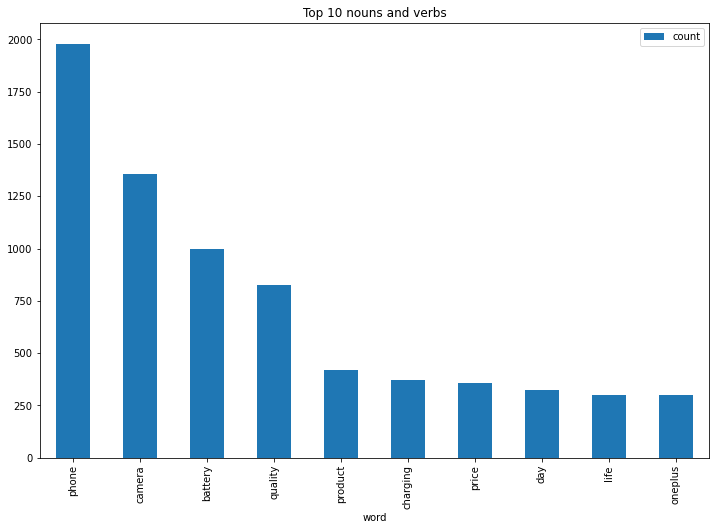

In [92]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

In [93]:
# Feature Extraction for 'Key Words'
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])
# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

### Fetch sentiments
#### To proceed further, we need to know the sentiment type of every tweet, that can be done using two ways:
##### a. Using NLTK's SentimentIntensityAnalyzer (We'll refer as SIA)
##### b. Using TextBlob

In [94]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [95]:
sentiments_using_SIA = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

Clean_Reviews
pos           4370
neg            580

In [96]:
dataframe.Clean_Reviews[8]

'heating problem outherwise welll'

In [97]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(dataframe.Clean_Reviews[8])

{'neg': 0.474, 'neu': 0.526, 'pos': 0.0, 'compound': -0.4019}

In [98]:
df=pd.DataFrame()
df['Review'] = dataframe.Clean_Reviews
df['scores'] = dataframe['Clean_Reviews'].apply(lambda review: sid.polarity_scores(review))
df.head()

Review  \
0  nice mobile good performance one plus nord ce ...   
1  pro nice look good build clean ui sans bloatwa...   
2                            fingerprint reader good   
3                                               good   
4  like camera quality good touch quite smooth se...   

                                              scores  
0  {'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'comp...  
1  {'neg': 0.087, 'neu': 0.518, 'pos': 0.395, 'co...  
2  {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...  
3  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...  
4  {'neg': 0.09, 'neu': 0.675, 'pos': 0.235, 'com...

In [99]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

Review  \
0  nice mobile good performance one plus nord ce ...   
1  pro nice look good build clean ui sans bloatwa...   
2                            fingerprint reader good   
3                                               good   
4  like camera quality good touch quite smooth se...   

                                              scores  compound  
0  {'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'comp...    0.8591  
1  {'neg': 0.087, 'neu': 0.518, 'pos': 0.395, 'co...    0.9201  
2  {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...    0.4404  
3  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...    0.4404  
4  {'neg': 0.09, 'neu': 0.675, 'pos': 0.235, 'com...    0.8837

In [100]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

Review  \
0     nice mobile good performance one plus nord ce ...   
1     pro nice look good build clean ui sans bloatwa...   
2                               fingerprint reader good   
3                                                  good   
4     like camera quality good touch quite smooth se...   
...                                                 ...   
4945  get automatic switched becomes hotautomatic re...   
4946  picture quality much good advertisement ad hoc...   
4947  according spec price high record video high he...   
4948  good mobile phone use month reviewing good fea...   
4949                                              happy   

                                                 scores  compound sentiment  
0     {'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'comp...    0.8591  Positive  
1     {'neg': 0.087, 'neu': 0.518, 'pos': 0.395, 'co...    0.9201  Positive  
2     {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...    0.4404  Positive  
3     {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...    0.4404  Positive  
4     {'neg': 0.09, 'neu': 0.675, 'pos': 0.235, 'com...    0.8837  Positive  
...                                                 ...       ...       ...  
4945  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   Neutral  
4946  {'neg': 0.146, 'neu': 0.541, 'pos': 0.314, 'co...    0.4767  Positive  
4947  {'neg': 0.145, 'neu': 0.699, 'pos': 0.156, 'co...    0.0516  Positive  
4948  {'neg': 0.0, 'neu': 0.463, 'pos': 0.537, 'comp...    0.9468  Positive  
4949  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...    0.5719  Positive  

[4950 rows x 4 columns]

In [101]:
from collections import defaultdict
from plotly import tools
from plotly.offline import iplot
#Filtering data
positive_review = df[df["sentiment"]=='Positive'].dropna()
neutral_review = df[df["sentiment"]=='Neutral'].dropna()
negative_review = df[df["sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram = 1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y =df["word"].values[::-1],
        x = df["wordcount"].values[::-1],
        showlegend = False,
        orientation = 'h',
        marker = dict(
            color = color,
        ),
    )
    return trace

## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in positive_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(20), 'blue')


## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in neutral_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(20), 'purple')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in negative_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(20), 'yellow')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

C:\Users\kumar\anaconda3\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [102]:
temp = df.groupby('sentiment').count()['Review'].reset_index().sort_values(by='Review',ascending=False)
temp.style.background_gradient(cmap='rainbow')

<AxesSubplot:xlabel='sentiment', ylabel='count'>

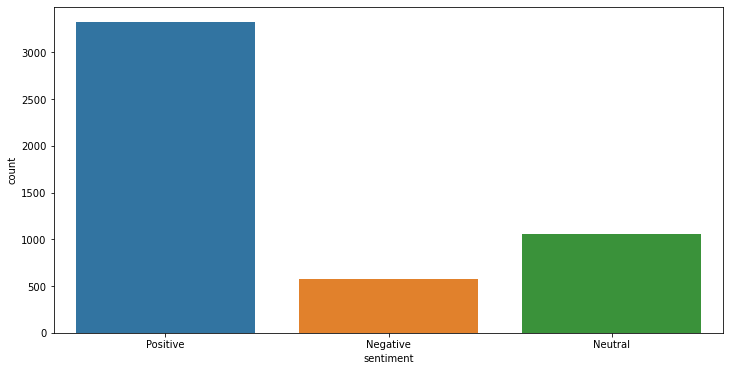

In [103]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

C:\Users\kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='compound', ylabel='Density'>

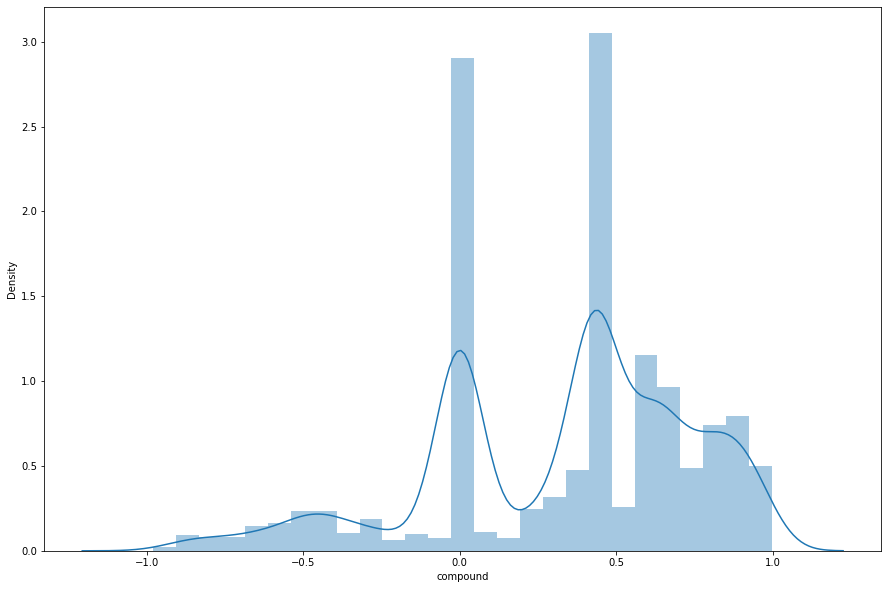

In [104]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(df['compound'])

In [105]:
df['word_count'] = df['Review'].apply(lambda x: len(str(x).split(" ")))
df[['Review','word_count']].head()

Review  word_count
0  nice mobile good performance one plus nord ce ...          16
1  pro nice look good build clean ui sans bloatwa...          31
2                            fingerprint reader good           3
3                                               good           1
4  like camera quality good touch quite smooth se...          57

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='compound'>

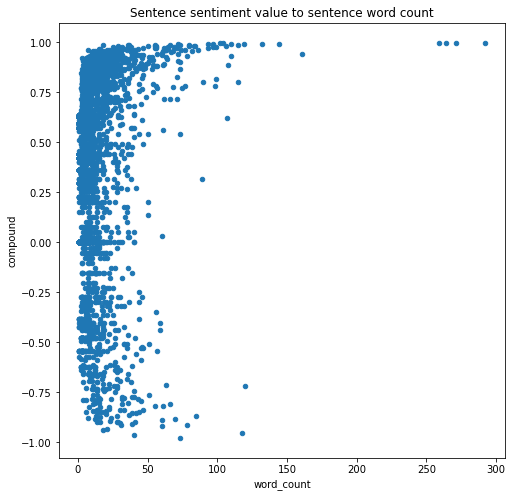

In [106]:
# Correlation analysis
df.plot.scatter(x='word_count',y='compound',figsize=(8,8),title='Sentence sentiment value to sentence word count')

In [107]:
# Using TextBlob
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

Clean_Reviews
pos           4476
neg            474

In [108]:
# let's calculate subjectivity and Polarity
# function for subjectivity
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

Clean_Reviews  \
0  nice mobile good performance one plus nord ce ...   
1  pro nice look good build clean ui sans bloatwa...   
2                            fingerprint reader good   
3                                               good   
4  like camera quality good touch quite smooth se...   

                                   Uncleaned_Reviews  Subjectivity  Polarity  
0  Nice mobile. Good Performance One Plus Nord Ce...      0.833333  0.633333  
1  Pros#Nice looks & good build#Clean UI sans blo...      0.590000  0.406667  
2                         Fingerprint reader is good      0.600000  0.700000  
3                                               Good      0.600000  0.700000  
4  Like-1. Camera 📸 quality is good.2. Touch is q...      0.484664  0.262465

Text(0, 0.5, 'Subjectivity')

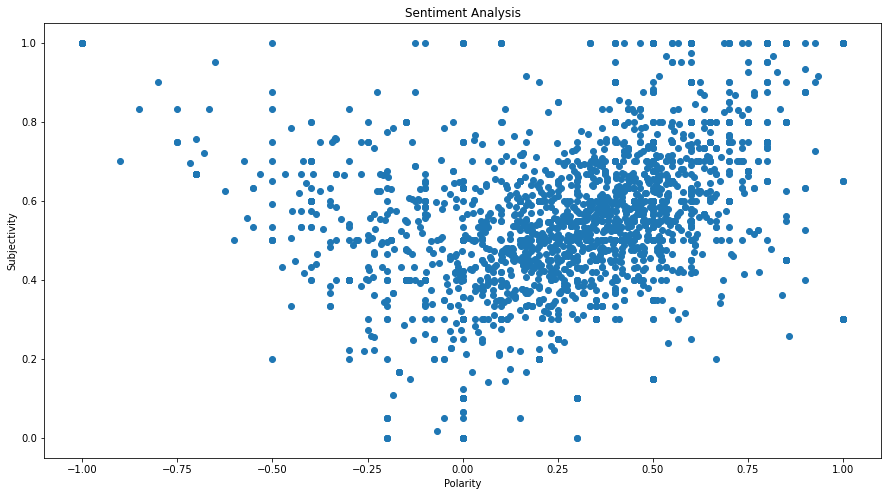

In [109]:
f, axes = plt.subplots(figsize = (15,8))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [110]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")


type_ = ["Positive", "Neutral", "Negative"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=df['sentiment'].value_counts(), name="sentiment"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Sentiment Analysis",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Sentiment', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [111]:
dataframe['sentiment'] = sentiments_using_SIA
dataframe.to_csv("D:\\execlr\\Assignments\\Assignment 11\\clean_review.csv",index=False)
dataframe.head()

Clean_Reviews  \
0  nice mobile good performance one plus nord ce ...   
1  pro nice look good build clean ui sans bloatwa...   
2                            fingerprint reader good   
3                                               good   
4  like camera quality good touch quite smooth se...   

                                   Uncleaned_Reviews  Subjectivity  Polarity  \
0  Nice mobile. Good Performance One Plus Nord Ce...      0.833333  0.633333   
1  Pros#Nice looks & good build#Clean UI sans blo...      0.590000  0.406667   
2                         Fingerprint reader is good      0.600000  0.700000   
3                                               Good      0.600000  0.700000   
4  Like-1. Camera 📸 quality is good.2. Touch is q...      0.484664  0.262465   

  sentiment  
0       pos  
1       pos  
2       pos  
3       pos  
4       pos

####  Visualization

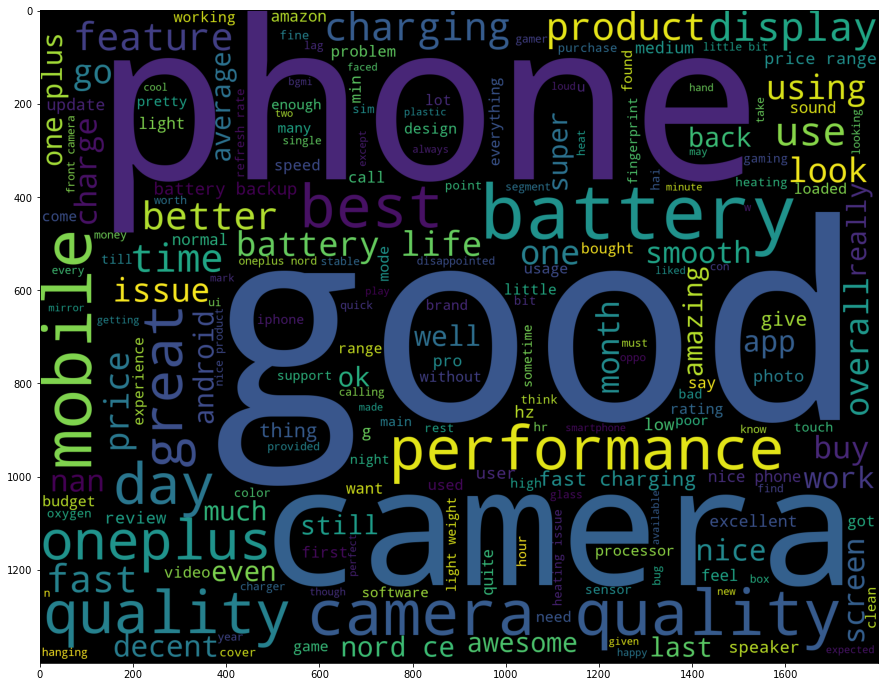

In [112]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(20,12))
wordcloud= WordCloud(
        background_color = 'black',
        width = 1800,
        height =1400).generate(allWords_)
plt.imshow(wordcloud)

In [113]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

###  Most common words in positive Review

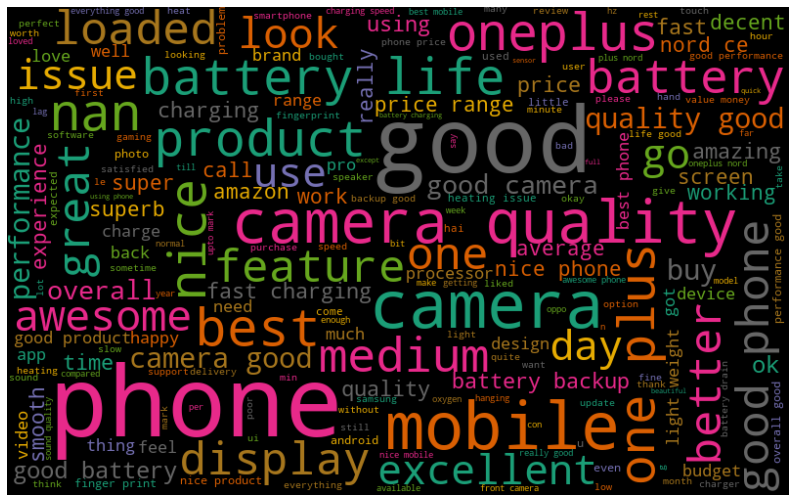

In [114]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

### Most common words in negative Review

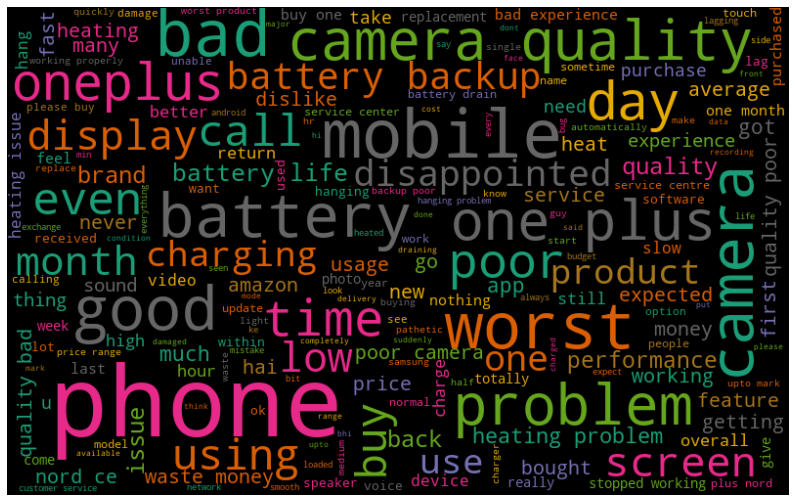

In [115]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)